In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('bol_sales.csv')
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_1,female,7065,4.6,30,105,117,1232
1,person_2,female,23028,9.8,23,81,70,1396
2,person_3,female,103377,9.2,11,38,94,1240
3,person_4,female,9815,3.2,16,54,124,720
4,person_5,female,22646,10.1,21,78,119,1379


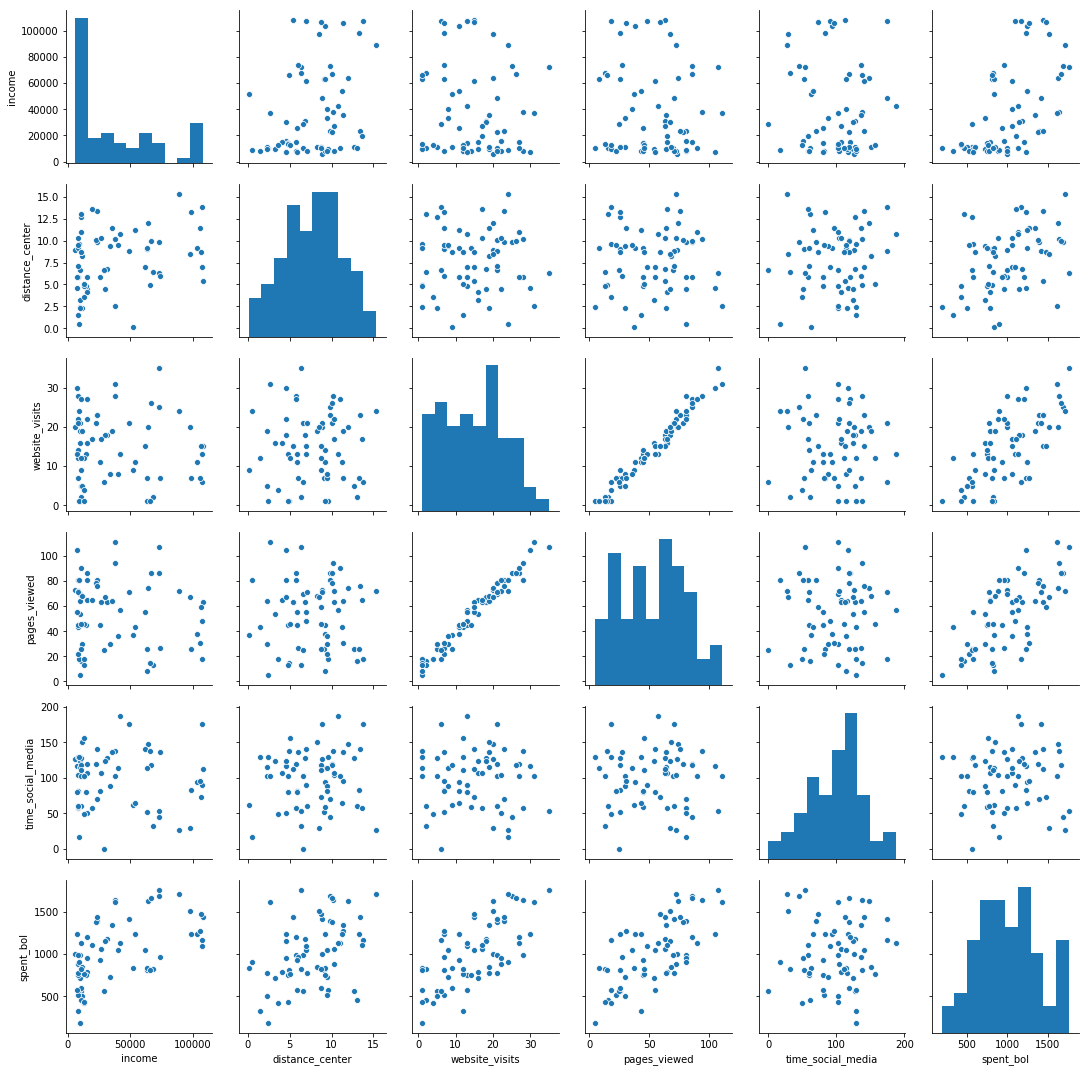

In [4]:
sns.pairplot(df)

In [6]:
df.corr()

,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
income,1.000000,0.298612,-0.085088,-0.095738,-0.065139,0.565621
distance_center,0.298612,1.000000,0.006597,-0.016633,0.093626,0.392954
website_visits,-0.085088,0.006597,1.000000,0.983754,-0.035425,0.677874
pages_viewed,-0.095738,-0.016633,0.983754,1.000000,-0.000302,0.682696
time_social_media,-0.065139,0.093626,-0.035425,-0.000302,1.000000,0.034558
spent_bol,0.565621,0.392954,0.677874,0.682696,0.034558,1.000000


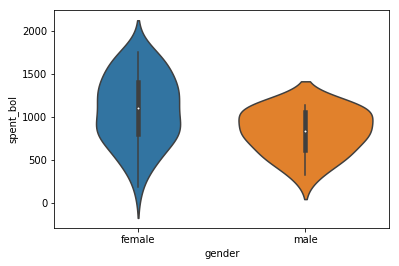

In [43]:
sns.violinplot(x='gender', y='spent_bol', data=df)

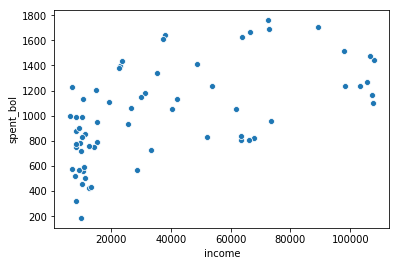

In [44]:
sns.scatterplot(x='income', y='spent_bol', data=df)

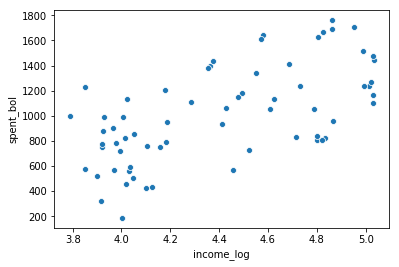

In [50]:
df['income_log']= df['income'].apply(math.log10)
sns.scatterplot(x='income_log', y='spent_bol', data=df)

In [52]:
dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, dummies], axis=1)
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,income_log,female,male
0,person_1,female,7065,4.6,30,105,117,1232,3.849112,1,0
1,person_2,female,23028,9.8,23,81,70,1396,4.362256,1,0
2,person_3,female,103377,9.2,11,38,94,1240,5.014424,1,0
3,person_4,female,9815,3.2,16,54,124,720,3.991890,1,0
4,person_5,female,22646,10.1,21,78,119,1379,4.354992,1,0


In [53]:
X = df[['income_log', 'distance_center', 'website_visits', 'female']]
X.head()

,income_log,distance_center,website_visits,female
0,3.849112,4.6,30,1
1,4.362256,9.8,23,1
2,5.014424,9.2,11,1
3,3.991890,3.2,16,1
4,4.354992,10.1,21,1


In [54]:
y = df['spent_bol']

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)
lm.coef_

array([ 517.3542101 ,   26.3249302 ,   30.80746797,  162.35505322])

In [56]:
y_pred = lm.predict(X)

In [57]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(df['spent_bol'],y_pred))

63.74979362634677

In [58]:
df_ho = pd.read_csv('bol_sales_holdout.csv')

dummies = pd.get_dummies(df_ho['gender'])
df_ho = pd.concat([df_ho, dummies], axis=1)

df_ho['income_log']= df_ho['income'].apply(math.log10)

X_ho = df_ho[['income_log', 'distance_center', 'website_visits', 'female']]

In [59]:
y_pred_ho = lm.predict(X_ho)

In [60]:
df_answers = pd.read_csv('bol_sales_holdout_answers.csv')
math.sqrt(mean_squared_error(df_answers['spent_bol'],y_pred_ho))

83.92373028885682